## INTRODUCTION

The data for this problem is downloaded from the below site.
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
    


In [14]:
# Load all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.simplefilter('ignore')

# ML libraries
from sklearn.cluster import KMeans

In [43]:
# Read the data from the csv
data = pd.read_csv('data_stocks.csv')

In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### The various columns that are there are:

In [6]:
list(data.columns)

['DATE',
 'SP500',
 'NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NASDAQ.INCY',
 

In [8]:
print ("The number of columns in the dataset is : ", len(data.columns))

The number of columns in the dataset is :  502


#### Check for nulls, or dirty values

In [9]:
data.isnull().sum().sum()

0

In [12]:
data[data <= 0].sum().sum()

0.0

#### INFERENCE

- There are no null values
- There are no values less than 0

In [13]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [26]:
# Covert the date from UNIX timestamp to Readable format
data.DATE = data.DATE.apply(lambda x : dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

In [30]:
print ("The number of unique dates are :", len(data.DATE.value_counts()))

The number of unique dates are : 128


In [36]:
data.drop("DATE", axis=1, inplace=True)

#### NOTE
Drop the DATE column. There are total of 128 days in the datasheet.

#### TRADING DAYS
The NYSE and NASDAQ average about 253 trading days a year. This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253. The holidays are New Year's Day, Martin Luther King Jr.


In [44]:
data.drop('DATE', axis=1, inplace=True)

In [31]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### NOTE

As we are not aware on what each compnay values are, we will shrink this dataset and obtain 2 parameters for each column for theoritical one year period. (252 trading days)
 1. Average annual returns (mean)
 2. Volatility (Std)

In [51]:
returns = pd.DataFrame(data.pct_change().mean()* 252)

In [57]:
returns.columns = ["Returns"]

In [58]:
returns["Volatility"] = data.pct_change().std() * np.sqrt(252)

In [59]:
returns.head()

,Returns,Volatility
SP500,0.000279,0.003567
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395


### K MEANS

In [64]:
# Run the K means algirithm for a range of K values. You do not run for K=1 as it is the worst case scenario.

distorsion = []
for i in range(2, 20):
    # Create object of K means
    k_mean = KMeans(n_clusters=i, init='k-means++')
    k_mean.fit(returns)
    # Sum of squared distances of samples to their closest cluster center
    distorsion.append(k_mean.inertia_)

#### ELBOW CURVE

Text(0.5, 1.0, 'Elbow curve')

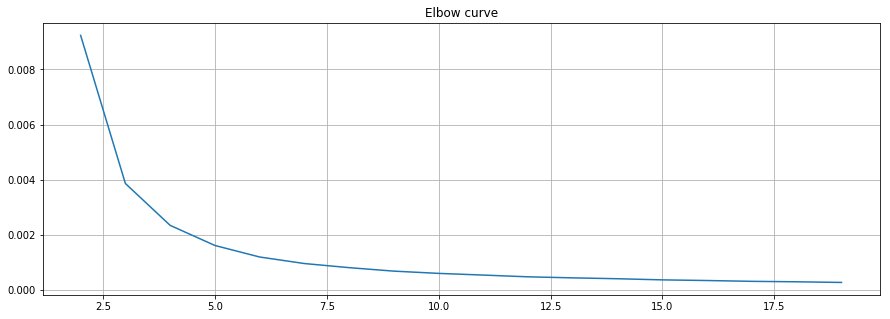

In [65]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsion)
plt.grid(True)
plt.title('Elbow curve')

#### NOTE

Clearly after 5 the SSE reduction drops with increase in the value of K. So we will consider K as 5

In [68]:
kmeans = KMeans(n_clusters=5)

In [69]:
kmeans.fit(returns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
# Map the cntroids to a label. This can be used for color mapping.
centroids=dict()
for idx, centre in enumerate(kmeans.cluster_centers_):
    centroids[idx] = list(centre)

In [79]:
centroids

{0: [0.0002344434545678742, 0.011005024589454583],
 1: [0.018950543362095656, 0.2347351666866968],
 2: [-0.00045893455953932864, 0.01580693876258325],
 3: [0.00038903526089872675, 0.007629001975536305],
 4: [-0.0004748291904638612, 0.024588145931134446]}

In [81]:
# Create a color map
colormap = {0: 'b', 1: 'y', 2: 'r', 3: 'g', 4: 'm'}

In [86]:
# Map the labels to a color
label_color = list(map(lambda x : colormap[x], kmeans.labels_))

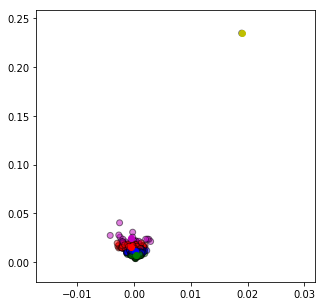

In [88]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(returns['Returns'], returns['Volatility'], color=label_color, alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[i])

plt.show()

#### NOTE
Clearly from the above there is an outlier. The same is resulting in the data from getting squeezed together in one area. Identify the same and remove it.

In [89]:
returns.idxmax()

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object

In [90]:
returns.drop('NYSE.XRX',inplace=True)

In [93]:
kmeans.fit(returns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
# Map the cntroids to a label. This can be used for color mapping.
centroids=dict()
for idx, centre in enumerate(kmeans.cluster_centers_):
    centroids[idx] = list(centre)
    
# Map the labels to a color
label_color = list(map(lambda x : colormap[x], kmeans.labels_))

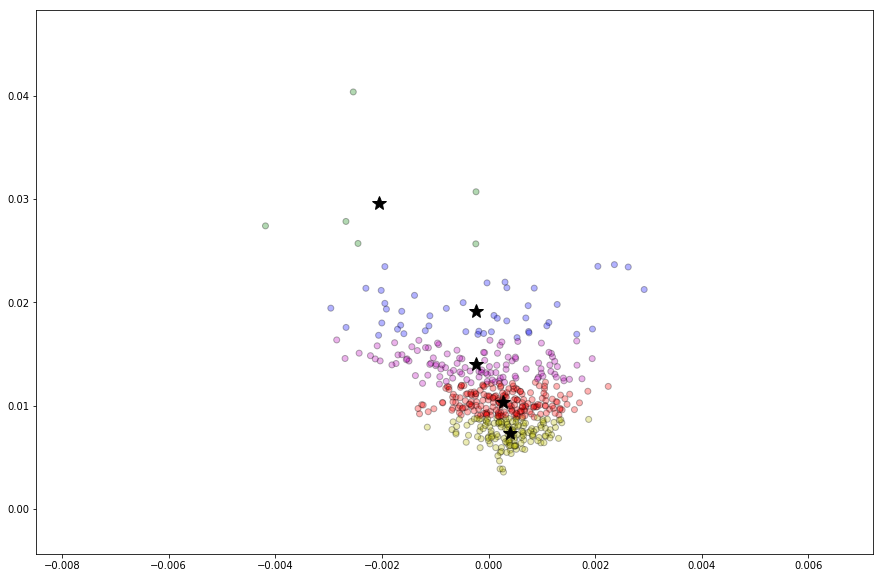

In [111]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(returns['Returns'], returns['Volatility'], color=label_color, alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.plot(*centroids[i], color='k',marker="*",markersize=15 )

plt.show()

### Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

In [122]:
zip_list = list(zip(returns.index,kmeans.labels_))

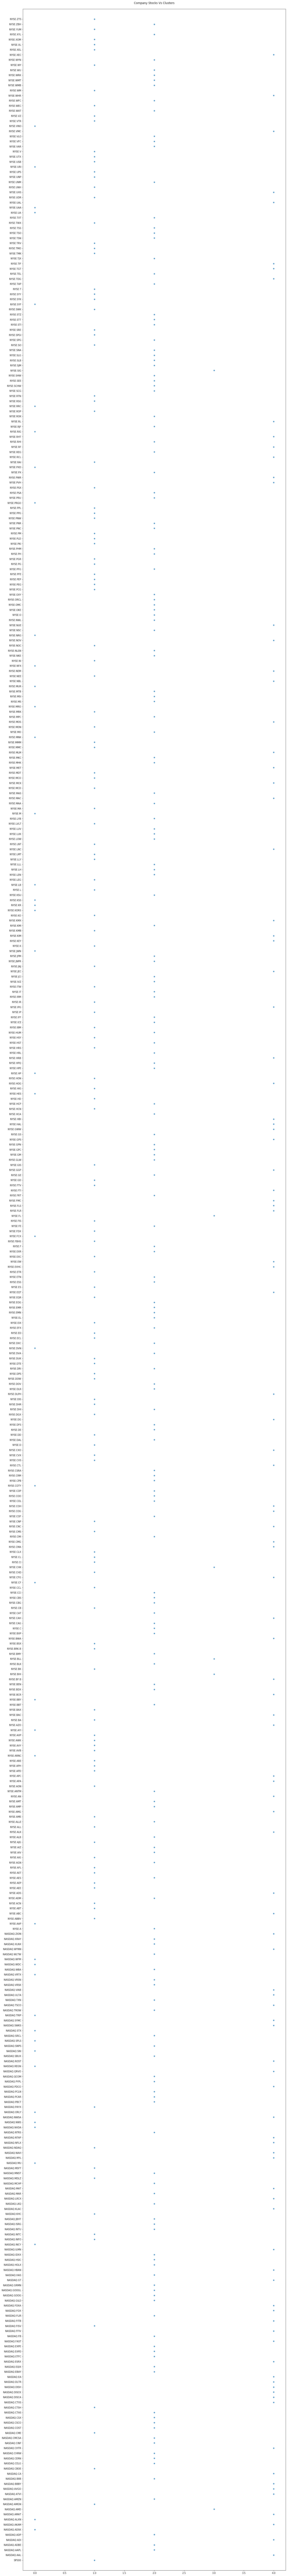

In [134]:
plt.figure(figsize=(20,200))
plt.title('Company Stocks Vs Clusters\n')
plt.ylim(-2, len(returns.index.values)+1)
sns.scatterplot(x=list(kmeans.labels_), y=returns.index)

### Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

Ans : Unique pattern is 5

### Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [135]:
list(zip(returns.index,kmeans.labels_))

[('SP500', 1),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 2),
 ('NASDAQ.ADBE', 2),
 ('NASDAQ.ADI', 4),
 ('NASDAQ.ADP', 2),
 ('NASDAQ.ADSK', 0),
 ('NASDAQ.AKAM', 4),
 ('NASDAQ.ALXN', 0),
 ('NASDAQ.AMAT', 4),
 ('NASDAQ.AMD', 3),
 ('NASDAQ.AMGN', 1),
 ('NASDAQ.AMZN', 2),
 ('NASDAQ.ATVI', 4),
 ('NASDAQ.AVGO', 4),
 ('NASDAQ.BBBY', 4),
 ('NASDAQ.BIIB', 2),
 ('NASDAQ.CA', 4),
 ('NASDAQ.CBOE', 1),
 ('NASDAQ.CELG', 2),
 ('NASDAQ.CERN', 2),
 ('NASDAQ.CHRW', 2),
 ('NASDAQ.CHTR', 4),
 ('NASDAQ.CINF', 2),
 ('NASDAQ.CMCSA', 2),
 ('NASDAQ.CME', 1),
 ('NASDAQ.COST', 2),
 ('NASDAQ.CSCO', 2),
 ('NASDAQ.CSX', 2),
 ('NASDAQ.CTAS', 2),
 ('NASDAQ.CTSH', 1),
 ('NASDAQ.CTXS', 4),
 ('NASDAQ.DISCA', 4),
 ('NASDAQ.DISCK', 4),
 ('NASDAQ.DISH', 4),
 ('NASDAQ.DLTR', 4),
 ('NASDAQ.EA', 4),
 ('NASDAQ.EBAY', 2),
 ('NASDAQ.EQIX', 2),
 ('NASDAQ.ESRX', 4),
 ('NASDAQ.ETFC', 2),
 ('NASDAQ.EXPD', 2),
 ('NASDAQ.EXPE', 2),
 ('NASDAQ.FAST', 4),
 ('NASDAQ.FB', 2),
 ('NASDAQ.FFIV', 4),
 ('NASDAQ.FISV', 1),
 ('NASDAQ.FITB', 4),
 ('NASD